# Classifying Disaster Tweets from Twitter

Start with Importing the necessary libraries for basic data exploration.

In [27]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Training Dataset:

In [4]:
df_train = pd.read_csv("train.csv")
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


1. Checking if the dataset has any null values.
2. If null values are found the depending on the percentage of null values we will either rop them or replace them with empty strings

In [5]:
df_train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

#### Observations and Solutions:
1. As We can see that the Location attributes has too many null values which means that we will drop the column completetly
2. Where as the Keyword column only has 61 null values so we will replace those with empty strings.

In [6]:
df_train.drop(columns=['location'], inplace = True)
df_train['keyword'].fillna(" ", inplace = True)
df_train.head()

,id,keyword,text,target
0,1,,Our Deeds are the Reason of this #earthquake M...,1
1,4,,Forest fire near La Ronge Sask. Canada,1
2,5,,All residents asked to 'shelter in place' are ...,1
3,6,,"13,000 people receive #wildfires evacuation or...",1
4,7,,Just got sent this photo from Ruby #Alaska as ...,1


### Tokenizing the Tweets:

For this step I will be using the TweetTokenizer available in the NLTK package

In [7]:
from nltk.tokenize import TweetTokenizer

tok = TweetTokenizer()

def tokenize_tweets(df):
    final_tokenized = []
    for i in range(len(df)):
        tokenized = tok.tokenize(df['text'][i])
        final_tokenized.append(tokenized)
        
    return final_tokenized

df_train['tok tweets'] = tokenize_tweets(df_train)
df_train.head()

,id,keyword,text,target,tok tweets
0,1,,Our Deeds are the Reason of this #earthquake M...,1,"[Our, Deeds, are, the, Reason, of, this, #eart..."
1,4,,Forest fire near La Ronge Sask. Canada,1,"[Forest, fire, near, La, Ronge, Sask, ., Canada]"
2,5,,All residents asked to 'shelter in place' are ...,1,"[All, residents, asked, to, ', shelter, in, pl..."
3,6,,"13,000 people receive #wildfires evacuation or...",1,"[13,000, people, receive, #wildfires, evacuati..."
4,7,,Just got sent this photo from Ruby #Alaska as ...,1,"[Just, got, sent, this, photo, from, Ruby, #Al..."


#### Removing the Stopwords:
This step is important to remove the noise or unecessary words that have no significance from the tweets the stopwords won't completely remove the noise but will make it much better than the current tweet.

In [8]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [9]:
def remove_stop_words():
    for i in range(len(df_train)):
        original_line = df_train['tok tweets'].iloc[i]
        stop_words = set(stopwords.words('english'))
        final_line = [word for word in original_line if word.lower() not in stop_words]
        df_train['tok tweets'].iloc[i] = final_line
        # print(final_line)
remove_stop_words()

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


#### Hashtag Collection:

- Collecting and Analysing Hashtags is very important in when working with tweets as Hashtags can contain very valuable information about the tweet.
- So in this step we will collect all the hashtags from the tweets and store them we will analyse these tweets later on.

In [10]:
import re
def collect_hashtags():
    hashtags = []
    regex = "#(\w+)"
    
    for i in range(len(df_train)):
        original_line = df_train['text'].iloc[i]
        hashtag_list = re.findall(regex, original_line)
        # print(hashtag_list)
        for hashtag in hashtag_list:
            # print(hashtag)
            hashtags.append(hashtag.lower())
        original_line_list = df_train['tok tweets'].iloc[i]
        for w in range(len(original_line_list)):
            if original_line_list[w][0] == "#":
                original_line_list[w] = original_line_list[w][1:]
        df_train['tok tweets'].iloc[i] =  original_line_list
        
    # print(original_line_list)
    return hashtags
        
hashtags = set(collect_hashtags())

In [11]:
print("Unique Hashtags Found: ", len(hashtags))
print(hashtags)

Unique Hashtags Found:  1926
{'robot', 'wxky', 'freaky', 'turkish', 'android', 'europe', 'sanelesstheory', 'cedarglade2015', 'sacramento', 'askh3cz', 'zippoline', 'cnbc', 'dontexpectnothing', 'emsne', 'kneelbot', 'scwx', 'megaquake', 'amageddon', 'bennycapricon', 'scichat', 'iphone', 'dublin', 'africa', 'bangladeshaffected', 'bangalore', 'nri', 'wired', 'cubs', 'windstorm', 'elephantintheroom', 'saveti', 'drained', 'henderson', 'lh_movie', 'seattle', 'labour', 'hail', 'standup', 'radiation', 'happy', 'irandeal', 'anonymous', 'cityofmemphis', 'newsdict', 'cum', 'earthquakenews', 'cndpoli', 'fantasticfour', 'thisispublichealth', 'rememberrabaa', 'msgdoing111welfareworks', 'meteoearth', 'tomclancy', 'globalwarming', 'gabon', 'tsunami', 'twcnewsclt', 'crossfit', 'wrecked', 'canontattoo', 'reuters', 'shipwreck', 'nwt', 'tribal', 'heavy', 'hugomatz', 'gaming', 'thomassmonson', 'bitcoing', 'man', 'auspol', 'thisiswhywecanthavenicethings', 'hempoil', 'ferguson', 'theresmorewherethatcamefrom', 

#### Mention Removal:

As the twets contain varions tags or mentions to irrelevant people that can unecessarily create noise in our data we will remove all the mentions from the tweets.

In [12]:
def remove_mentions():
    regex = "@(\w+)"
    for i in range(len(df_train)):
        original_line = df_train['text'].iloc[i]
        original_line_list = df_train['tok tweets'].iloc[i]
        mention_list = re.findall(regex, original_line)
        df_train['tok tweets'].iloc[i] = [word for word in original_line_list if word[1:] not in mention_list]
        # print(df_train['tok tweets'].iloc[i])
        
remove_mentions()  

#### Removing Punctuations:

In this step we will simply remove all the punctuations present in the tweet as punctuations are irrelevant to us.

In [13]:
def remove_punctuations():
    # takes care of all the links as well as links are not alpha numeric
    for i in range(len(df_train)):
        original_line = df_train['tok tweets'].iloc[i]
        final_line = [word for word in original_line if word.isalnum()]
        df_train['tok tweets'].iloc[i] = final_line
        # print(final_line)
remove_punctuations()

#### Removing Short words:

Even though we have removed most of the stop words, there still remain some words which are unecessary and haven't been removed earlier for example random letters and 2 letter words.

In [14]:
def remove_shorts():
    for i in range(len(df_train)):
        original_line = df_train['tok tweets'].iloc[i]
        final_line = [word for word in original_line if len(word) > 3]
        df_train['tok tweets'].iloc[i] = final_line
        
remove_shorts()

#### Stemming / Lemmatization of words:

Stemming and Lemmatization are basically the processes to shorten a word in the tweet with the major difference between the two being that lemmatization gives us the root of the word for example Lemmatizer will convert best or better to good which is the root word where as a stemmer will jsut look out for prefixes and suffixes and remove those for example adjustable will be converted to adjust.

So in this step we will be lemmatizing the words in our tweet.

In [15]:
from nltk.stem import WordNetLemmatizer

def lemmatize():
    lem = WordNetLemmatizer()
    for i in range(len(df_train)):
        original_line = df_train.loc[i, 'tok tweets']
        for j in range(len(original_line)):
            x = lem.lemmatize(original_line[j].lower())
            df_train.loc[i, 'tok tweets'][j] = x
        # print(original_line)
lemmatize()

In [16]:
df_train.head()

,id,keyword,text,target,tok tweets
0,1,,Our Deeds are the Reason of this #earthquake M...,1,"[deed, reason, earthquake, allah, forgive]"
1,4,,Forest fire near La Ronge Sask. Canada,1,"[forest, fire, near, ronge, sask, canada]"
2,5,,All residents asked to 'shelter in place' are ...,1,"[resident, asked, shelter, place, notified, of..."
3,6,,"13,000 people receive #wildfires evacuation or...",1,"[people, receive, wildfire, evacuation, order,..."
4,7,,Just got sent this photo from Ruby #Alaska as ...,1,"[sent, photo, ruby, alaska, smoke, wildfire, p..."


#### Hashtags Analysis:

Now we will analyze the hashtags that we have collected from our data in the previous step but before that we will lemmatize the hashtags we have as we have lemmatize all the words of our tweets missing this step could be very dangerous as it could lead to wrong interpretations and results and can possibly afftect the performance of our model as well.

In [17]:
def lemmatize_hashtags(hashtag_list):
    lemmatizer = WordNetLemmatizer()
    for i in range(len(hashtag_list)):
        hashtag_list[i] = lemmatizer.lemmatize(hashtag_list[i])
    return set(hashtag_list)

hashtags = lemmatize_hashtags(list(hashtags))

In [18]:
print("Unique Hashtags Found: ", len(hashtags))
print(hashtags)

Unique Hashtags Found:  1901
{'robot', 'wxky', 'android', 'freaky', 'turkish', 'europe', 'sanelesstheory', 'cedarglade2015', 'sacramento', 'askh3cz', 'zippoline', 'cnbc', 'dontexpectnothing', 'emsne', 'kneelbot', 'scwx', 'megaquake', 'amageddon', 'bennycapricon', 'scichat', 'ice', 'iphone', 'dublin', 'africa', 'bangladeshaffected', 'bangalore', 'nri', 'wired', 'windstorm', 'elephantintheroom', 'saveti', 'drained', 'henderson', 'lh_movie', 'seattle', 'labour', 'hail', 'standup', 'radiation', 'happy', 'irandeal', 'anonymous', 'cityofmemphis', 'newsdict', 'cum', 'earthquakenews', 'cndpoli', 'fantasticfour', 'thisispublichealth', 'rememberrabaa', 'nazi', 'msgdoing111welfareworks', 'meteoearth', 'tomclancy', 'globalwarming', 'gabon', 'tsunami', 'twcnewsclt', 'crossfit', 'wrecked', 'canontattoo', 'reuters', 'shipwreck', 'program', 'nwt', 'tribal', 'heavy', 'hugomatz', 'gaming', 'thomassmonson', 'bitcoing', 'man', 'auspol', 'thisiswhywecanthavenicethings', 'hempoil', 'ferguson', 'theresmorewh

**Now that we have all the unique Hashtags we will find out their frequency and look out for the top 15 to 20 most frequent hashtags**

In [20]:
def count_tag_frequency(hashtag_list):
    counter = dict()
    for i in hashtag_list:
        counter[i] = 0
    
    for i in hashtag_list:
        for j in range(len(df_train)):
            l = df_train['tok tweets'].iloc[j]
            occ = l.count(i)
            counter[i] += occ
    return(counter)

hashtag_frequencies = count_tag_frequency(hashtags)

**Now that we have the freqency of all the hashtags we will find out the top 150 tags out of or 1000+ tags these will be the tags which we will use for our model**

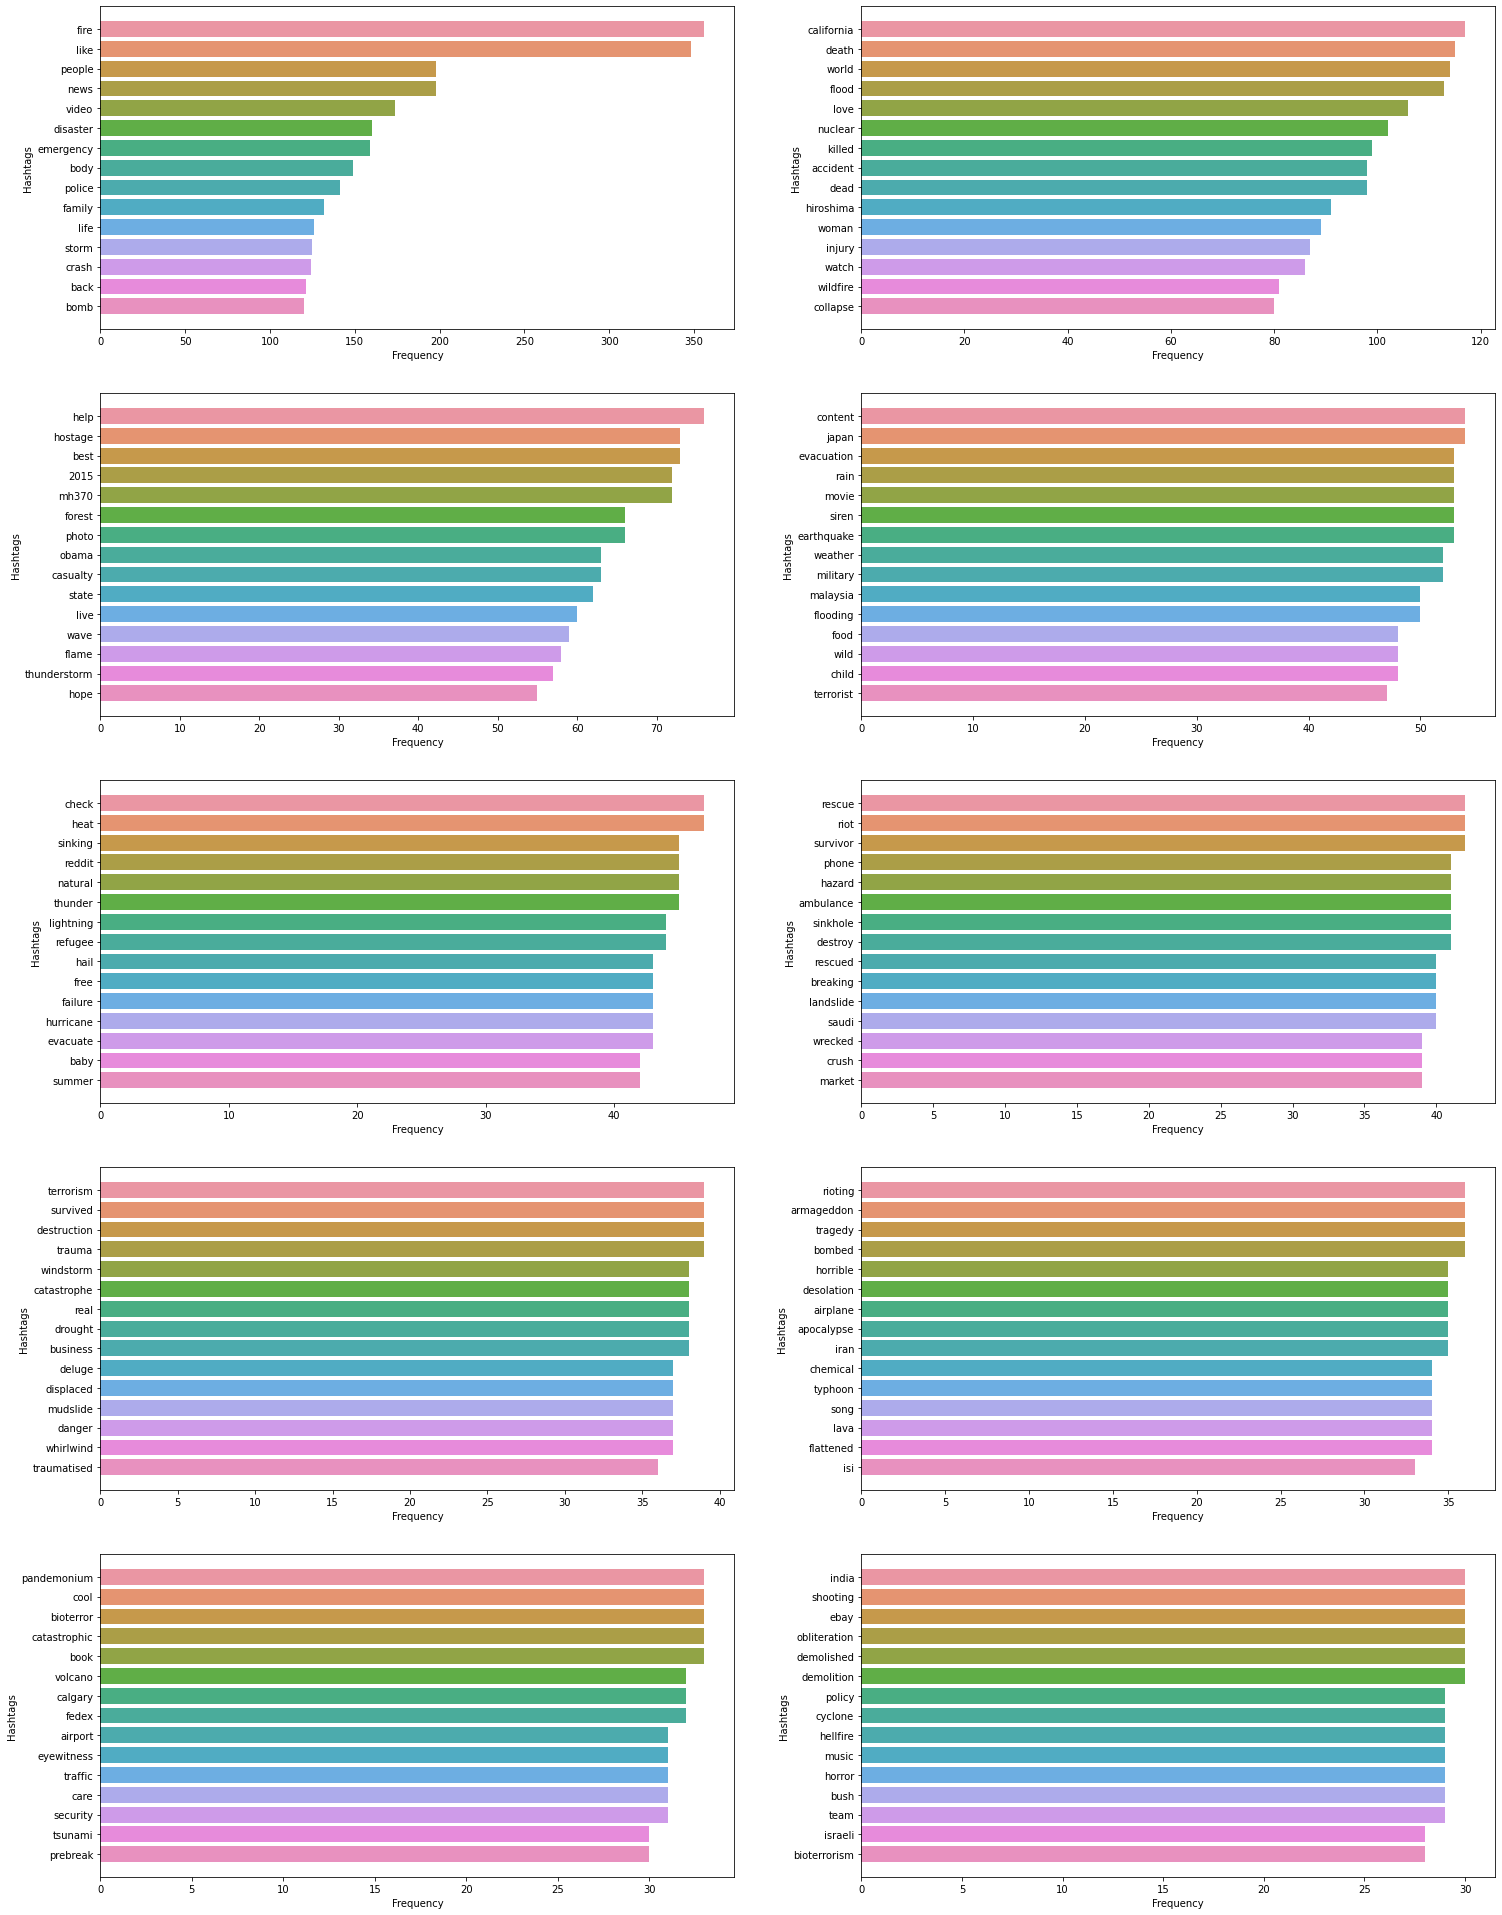

In [38]:
from collections import Counter

top_150_tags = dict(Counter(hashtag_frequencies).most_common(150))

# plotting 10 bar charts with 15 hashtags and their frequency
figure = plt.figure(figsize=(25, 70))
for i in range(1, 11):
    plt.subplot(10,2,i)
    W = list(top_150_tags.keys())
    F = list(top_150_tags.values())
    words = []
    frequency = []
    for j in range(15*i - 15, 15*i):
        words.append(W[j])
        frequency.append(F[j])
    
    sns.barplot(y = words, x = frequency)
    plt.xlabel("Frequency")
    plt.ylabel("Hashtags")
    plt.plot()